### Preliminaries

In [68]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels 
from statsmodels.sandbox.regression.gmm import GMM, IV2SLS, IVGMM
from pandas.testing import assert_index_equal

In [69]:
df = pd.read_csv("rcl_data_4.csv")
df.set_index(keys=['mktid','firmid', 'prodid'], inplace=True)
shares = df['share']

## Summary statistics

In [70]:
df_widxs = df.copy()
df_widxs['firmid'] = df_widxs.index.get_level_values('firmid')
df_widxs['prodid'] = df_widxs.index.get_level_values('prodid')
stats_mktlvl = df_widxs.groupby(by=['mktid']).aggregate({'firmid': 'count', 'prodid': 'count'})
stats_mktlvl.rename(columns={"firmid": "#Firms", "prodid": "#Products"}, inplace=True)
nfirms = stats_mktlvl["#Firms"]
nprods = stats_mktlvl["#Products"]
df_std = df.groupby('mktid').mean()
df_mean = df.groupby('mktid').median()
stats_mktlvl.join(df_mean.join(df_std,rsuffix='_std',lsuffix='_mean'))

,#Firms,#Products,price_mean,share_mean,xvar_mean,wvar_mean,price_std,share_std,xvar_std,wvar_std
mktid,,,,,,,,,,
1,7,7,2.606675,0.149334,1.952670,-0.370695,2.750983,0.118469,1.945542,-0.293838
2,7,7,2.430668,0.070118,2.685479,-0.564728,2.608820,0.136178,2.631723,-0.270162
3,7,7,2.844954,0.082008,2.660057,-0.126529,3.098984,0.128079,2.576645,0.065384
4,11,11,3.326305,0.009768,1.946938,0.218622,3.530610,0.072886,1.983285,0.168326
5,11,11,2.663987,0.027104,1.946938,-0.089058,2.854352,0.082693,1.801961,-0.154398
6,8,8,2.698184,0.039247,1.949804,0.131254,2.950200,0.106947,1.940615,0.029890
7,6,6,2.966885,0.122192,2.030004,0.142384,2.868110,0.121251,1.825464,-0.006352
8,12,12,3.088131,0.014099,2.077402,0.061042,3.062927,0.073310,2.144377,0.101264
9,10,10,3.246889,0.021610,1.957790,0.171797,3.361858,0.076573,2.155827,0.141241


### Market Summaries

In [71]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(15,6)})

<AxesSubplot: xlabel='mktid', ylabel='share'>

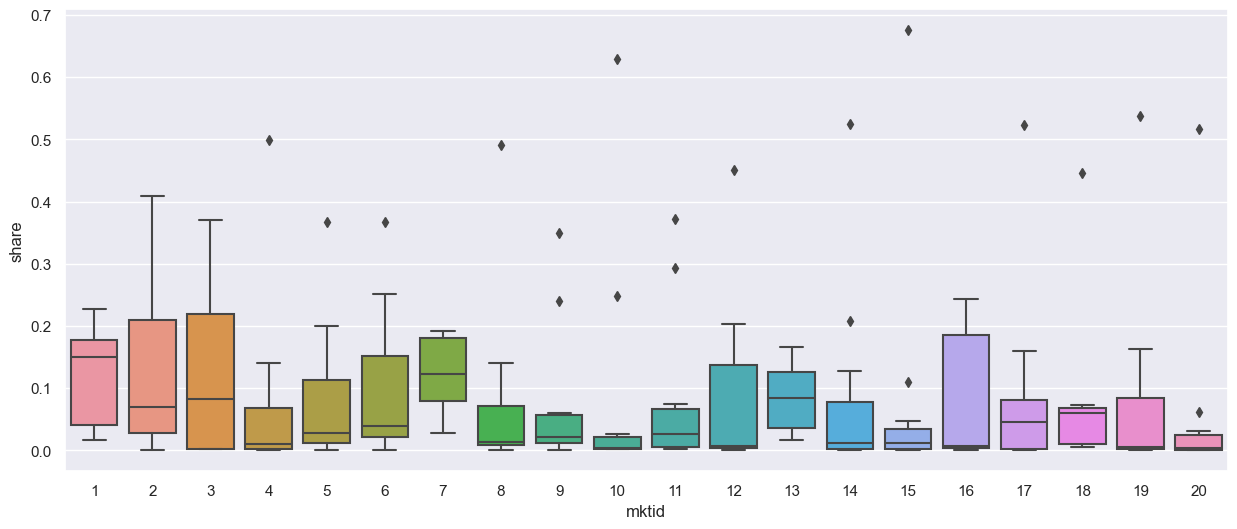

In [72]:
# Shares by Market
sns.boxplot(x="mktid", y="share",data=df.reset_index())

<AxesSubplot: xlabel='mktid', ylabel='price'>

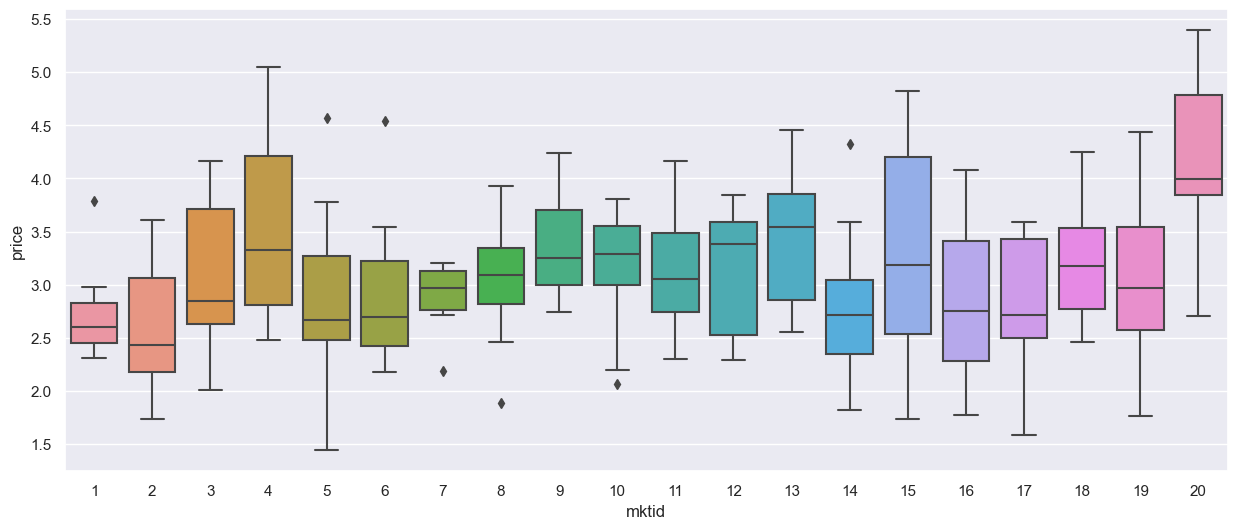

In [73]:
# Prices by Market
sns.boxplot(x="mktid", y="price",data=df.reset_index())

<AxesSubplot: xlabel='mktid', ylabel='wvar'>

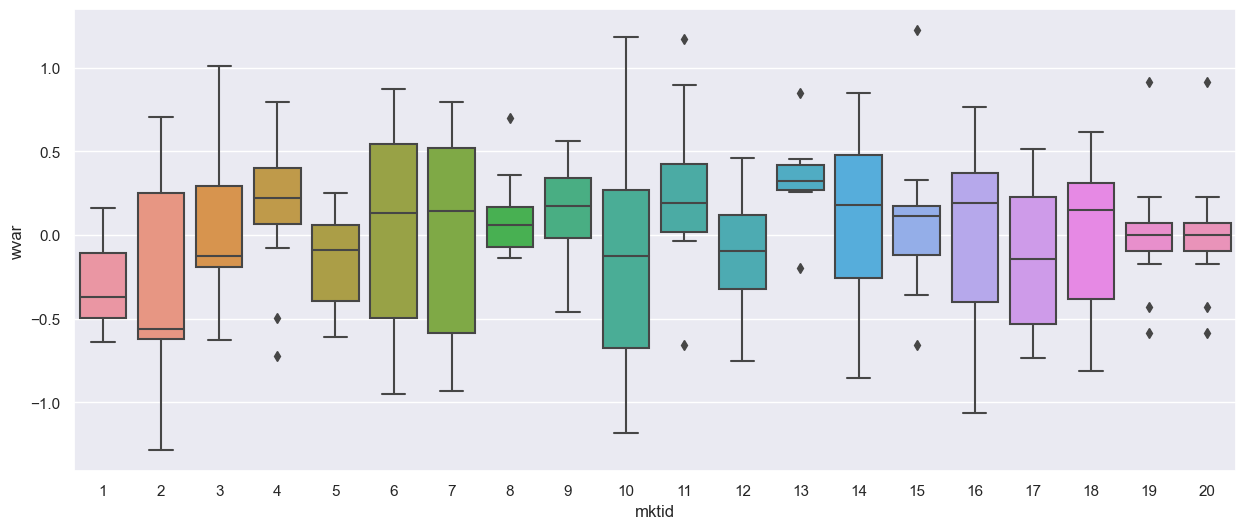

In [74]:
# Costs by Market
sns.boxplot(x="mktid", y="wvar",data=df.reset_index())

<AxesSubplot: xlabel='mktid', ylabel='xvar'>

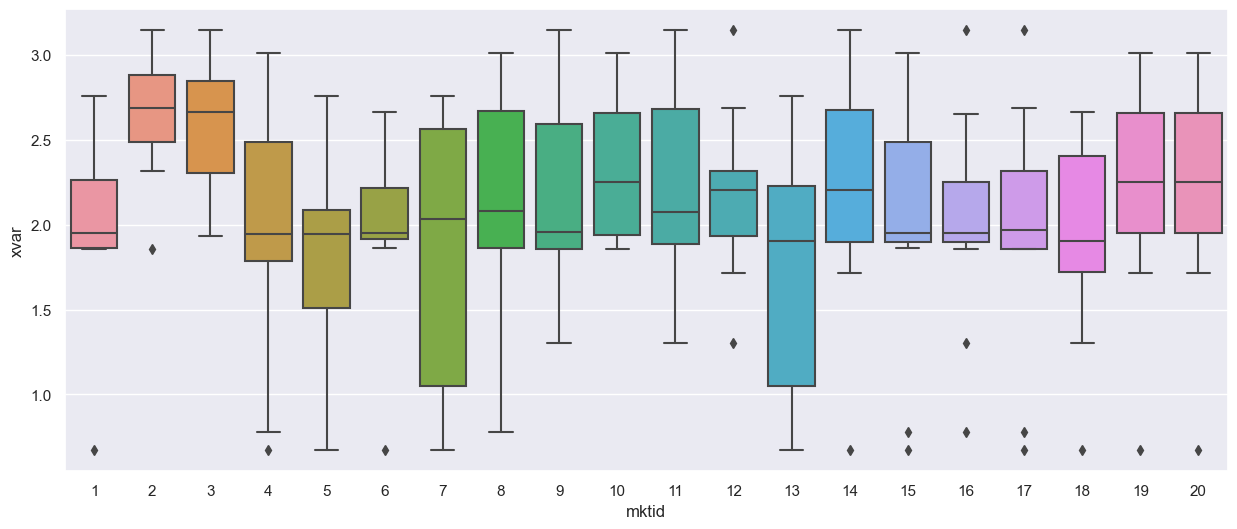

In [75]:
# Characteristics by Market
sns.boxplot(x="mktid", y="xvar",data=df.reset_index())

<AxesSubplot: xlabel='mktid', ylabel='wvar'>

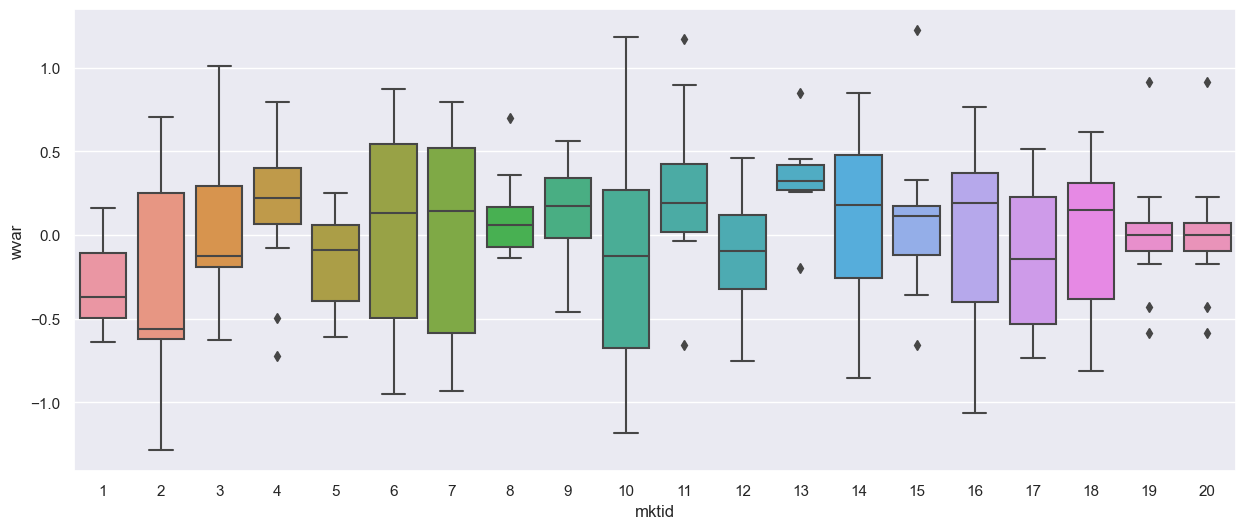

In [76]:
# Characteristics by Market
sns.boxplot(x="mktid", y="wvar",data=df.reset_index())

### Firm Summaries

<AxesSubplot: xlabel='firmid', ylabel='price'>

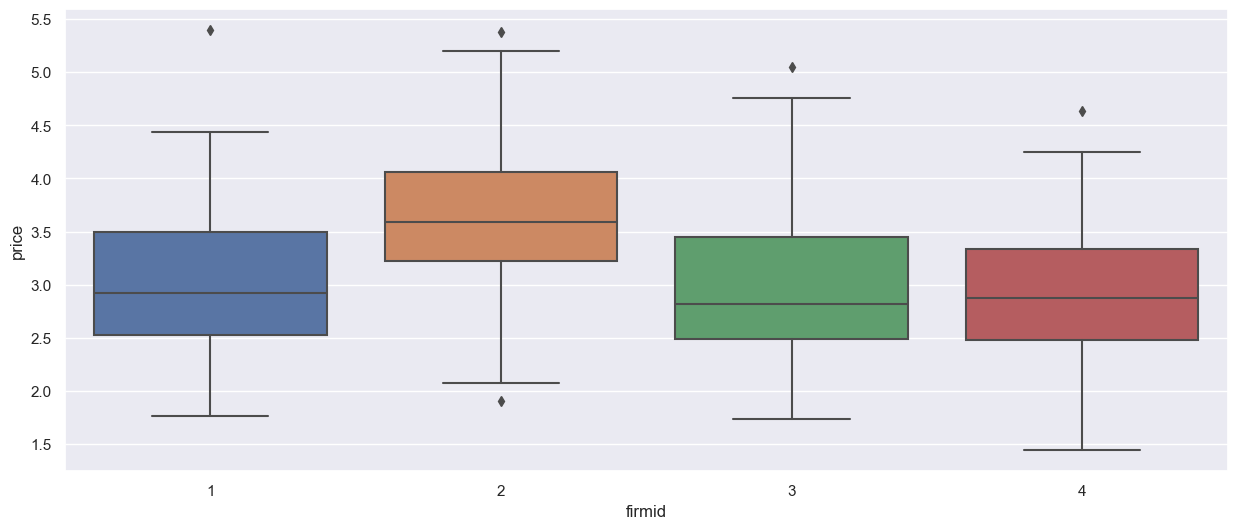

In [77]:
# Prices by Firm
sns.boxplot(x="firmid", y="price",data=df.reset_index())

<AxesSubplot: xlabel='firmid', ylabel='wvar'>

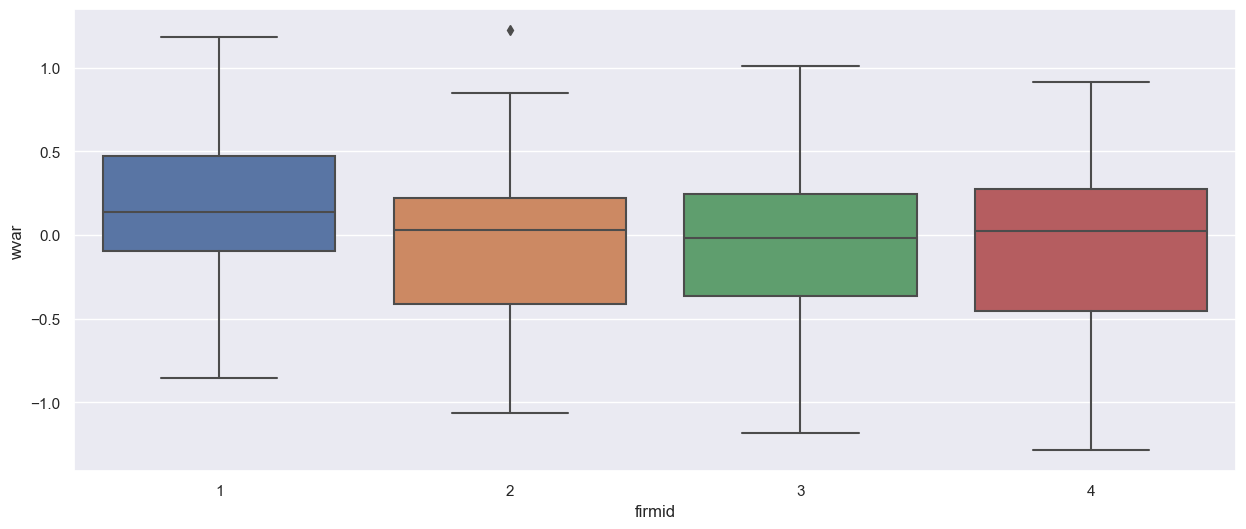

In [78]:
# Costs by Firm
sns.boxplot(x="firmid", y="wvar",data=df.reset_index())

<AxesSubplot: xlabel='firmid', ylabel='xvar'>

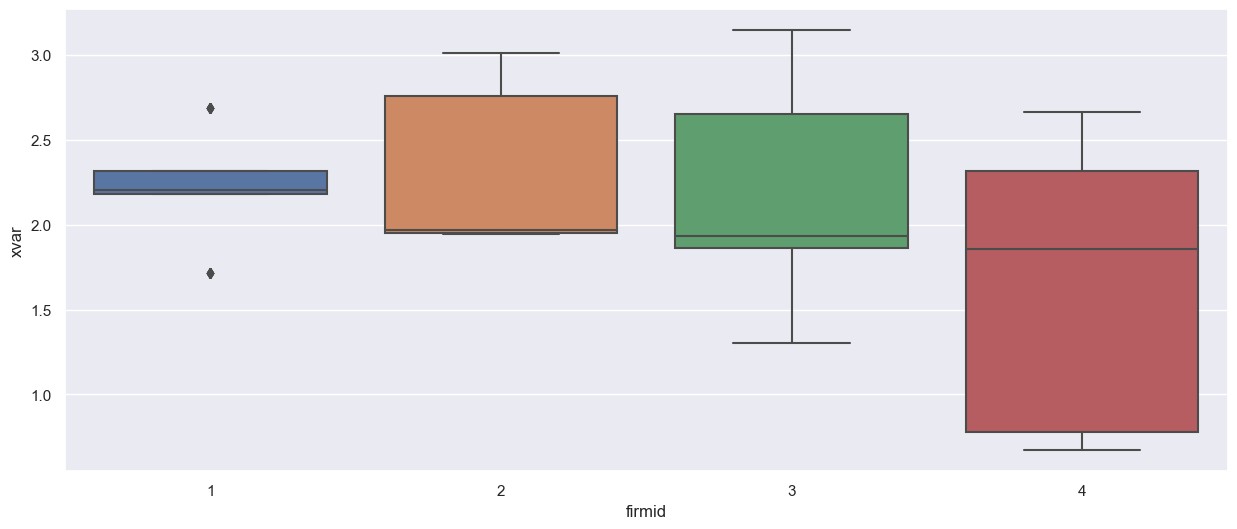

In [79]:
# Characteristics by Firm
sns.boxplot(x="firmid", y="xvar",data=df.reset_index())

### Product Summaries

<AxesSubplot: xlabel='prodid', ylabel='price'>

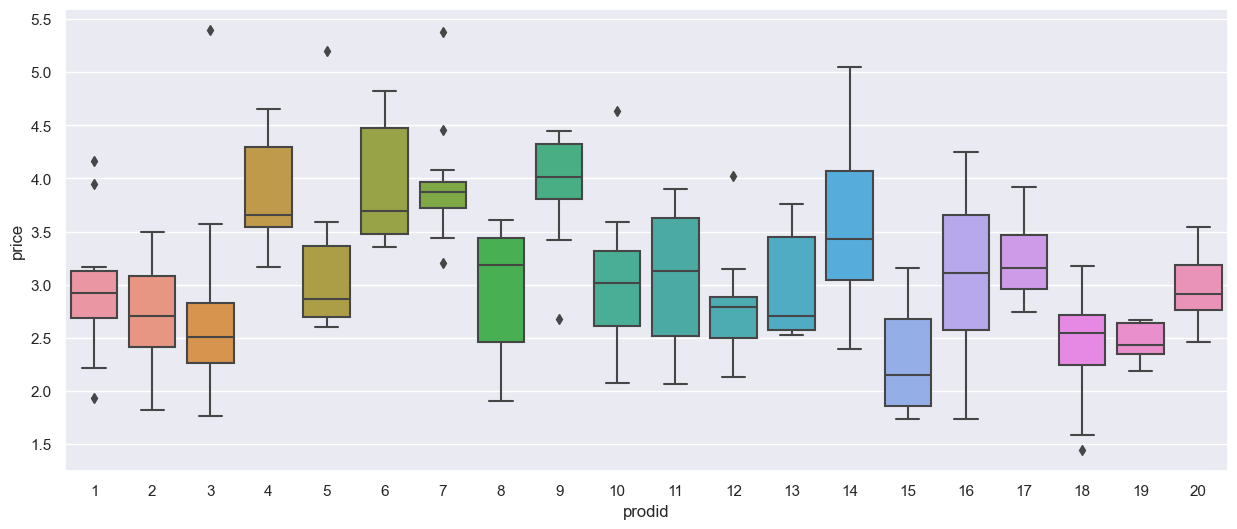

In [80]:
# Prices by Prod
sns.boxplot(x="prodid", y="price",data=df.reset_index())

<AxesSubplot: xlabel='prodid', ylabel='wvar'>

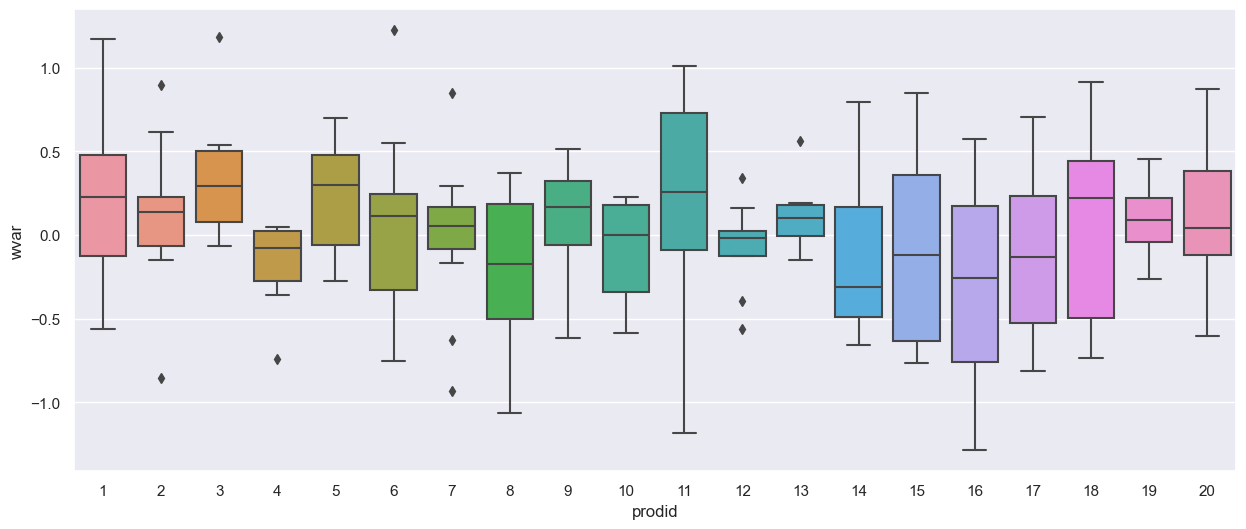

In [81]:
# Costs by Prod
sns.boxplot(x="prodid", y="wvar",data=df.reset_index())

## Logit model warmup

### OLS

In [82]:
df["log_share"] = np.log(df["share"])
logit_ols = sm.ols(formula="log_share ~ xvar + price", data=df).fit()
print(logit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              log_share   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     340.1
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.07e-62
Time:                        12:26:13   Log-Likelihood:                -274.26
No. Observations:                 188   AIC:                             554.5
Df Residuals:                     185   BIC:                             564.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4678      0.360      4.073      0.0

eval_env: 1


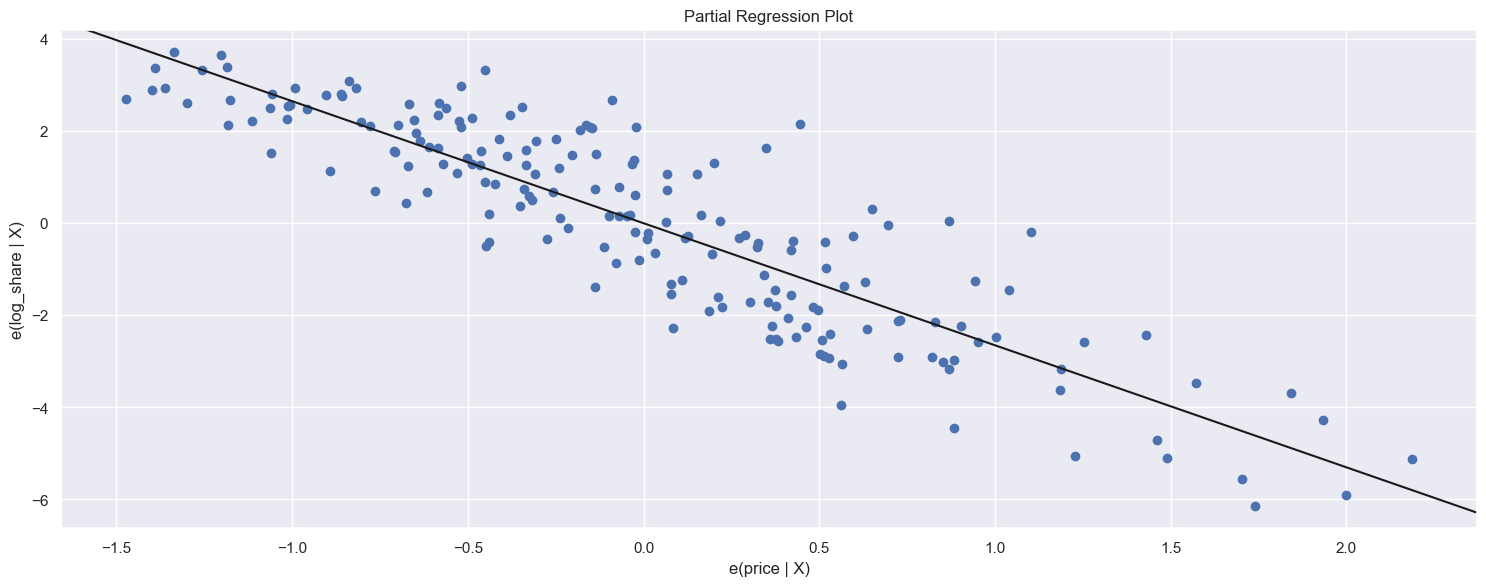

In [83]:
# Partial Regression Plot of logshare-E[logshare|xvar] on price-E[price|xvar]
import statsmodels.api as sm_
fig = sm_.graphics.plot_partregress("log_share", "price", ["xvar"], data=df, obs_labels = False)
fig.tight_layout(pad=1.0)

### 2SLS

In [84]:
import statsmodels.api as sm_
Y = df["log_share"]
X = sm_.add_constant(df[["xvar", "price"]])
Z = sm_.add_constant(df[["xvar", "wvar"]])
logit_2sls = IV2SLS(endog=Y,exog=X, instrument=Z).fit()
constant, alpha, beta = logit_2sls.params
print(logit_2sls.summary())

                          IV2SLS Regression Results                           
Dep. Variable:              log_share   R-squared:                       0.785
Model:                         IV2SLS   Adj. R-squared:                  0.783
Method:                     Two Stage   F-statistic:                     86.48
                        Least Squares   Prob (F-statistic):           3.04e-27
Date:                Sun, 29 Jan 2023                                         
Time:                        12:26:14                                         
No. Observations:                 188                                         
Df Residuals:                     185                                         
Df Model:                           2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6599      0.583      2.846      0.0

### GMM

3. With GMM: When we have strong instruments, GMM is more efficient than 2SLS under heteroskedasticity because computes the 'optimal weighing matrix' to weigh sample moments. 

In [85]:
import statsmodels.api as sm_
Y = df["log_share"]
X = sm_.add_constant(df[["xvar", "price"]])
Z = sm_.add_constant(df[["xvar", "wvar"]])
logit_gmm = IVGMM(endog=Y,exog=X,instrument=Z).fit();
constant, alpha, beta = logit_gmm.params;
print(logit_gmm.summary());

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                                IVGMM Results                                 
Dep. Variable:              log_share   Hansen J:                    1.403e-11
Model:                          IVGMM   Prob (Hansen J):                   nan
Method:                           GMM                                         
Date: 

### Double Machine Learning 


$log(s)=αp+g(x)+e, E[e|x,w]=0$
 - Here $g$ is estimated by flexible machine learning methods
 - and $[x,w]$ are instruments

In [86]:
# %pip install doubleml
from doubleml import DoubleMLData, DoubleMLPLIV
from sklearn.ensemble import RandomForestRegressor
l = RandomForestRegressor() # Model for E[Y|X] = E[θD+g(X)]
g = RandomForestRegressor() # Model for E[Y - θD|X]=g(X)
m = RandomForestRegressor() # Model for E[D|X]
data = DoubleMLData(df, y_col="log_share",d_cols=["price"], x_cols=["xvar"],z_cols=[ "wvar"])
DML = DoubleMLPLIV(data, l, m, g, n_folds=5, apply_cross_fitting=True)
DML.fit();
print(DML.summary)
import numpy as np
beta = np.array(DML.summary).reshape(-1).tolist()[0]

           coef   std err          t         P>|t|     2.5 %    97.5 %
price -2.781506  0.168456 -16.511775  3.018709e-61 -3.111673 -2.451338


### Why do we need Instruments? 

Let demand curve be: $q=βp+d$ where $d$ is a random demand shifter (e.g. random holiday). Since demand shifters are likely to effect price (as price and quantity determined simultaneously), $E[dp] \not= 0$. 

- $q=βp+d, E[dp] \not= 0 \implies β \not= E[x^2]^{-1}E[yx]$
- So $\hat{β}=(\sum_{i}x_{i}^2)^{-1}(\sum_{i}y_{i}x_{i})$ will not converge to $β$

But if we have access to a supply/cost shifter $c$ (e.g. weather) that is exogenous to demand,

- $c \perp d$ 
- $q=p+c$. 

We can solve for price to get: 

- $p= \theta_{1}c + \theta_{2}d$

Thus  $c$  will influence both price and quantity but be uncorrelated with demand shocks. 
- $E[dc] = 0, E[pc] \not=0 \implies β = E[xc]^{-1}E[yc]$

Thus these are the two conditions for $c$ to be a valid instrument: 
- (untestable) $E[dc] = 0$ 
- (testable) $E[pc] \not= 0$. 

Examples of other Instruments: 
- Cost shifters: marginal costs, wages, fixed costs, input prices, prices in other markets (Hausman)
- Markup shifters: product characteristics, entry/exit events, merger/collusion event, 

### Elasticities 

In [87]:
def get_logit_elasticities(mktid: int) -> pd.DataFrame:
    df_mkt = df[df.index.get_level_values('mktid')==mktid].droplevel('mktid')
    mkt_elst = -alpha*np.dot(np.ones((nfirms.loc[mktid],1)), (df_mkt["price"]*df_mkt["share"]).to_numpy().reshape((1,nfirms.loc[mktid]))) + alpha*np.diag(df_mkt["price"])
    return pd.DataFrame(mkt_elst, index=df_mkt.index, columns=df_mkt.index)

Matrix of own and cross-price elasticities for market 1:

In [88]:
get_logit_elasticities(1)

firmid                1         2                   3         4            \
prodid               5         7         8         14        16        17   
firmid prodid                                                               
1      5       2.747569 -0.082290 -0.597102 -0.488058 -0.656011 -0.143866   
2      7      -0.807944  5.078138 -0.597102 -0.488058 -0.656011 -0.143866   
       8      -0.807944 -0.082290  2.810417 -0.488058 -0.656011 -0.143866   
3      14     -0.807944 -0.082290 -0.597102  2.780164 -0.656011 -0.143866   
4      16     -0.807944 -0.082290 -0.597102 -0.488058  3.003656 -0.143866   
       17     -0.807944 -0.082290 -0.597102 -0.488058 -0.656011  3.920104   
       18     -0.807944 -0.082290 -0.597102 -0.488058 -0.656011 -0.143866   

firmid                   
prodid               18  
firmid prodid            
1      5      -0.147731  
2      7      -0.147731  
       8      -0.147731  
3      14     -0.147731  
4      16     -0.147731  
       17     -0.147731  
       18      3.003402

### Hausman Instruments

Hausman instrument uses prices from other cities when cost data is unavailable. Let $i$ index cities,

$p_{i}= \theta_{1}c_{i} + \theta_{2}d_{i}$

Then $p_{-i}$ can be a valid instrument for $p_{i}$ when,

(1) $c_{i}$ is a valid instrument for $p_{i}$

(2) $E[c_{-i}c_{i}] \not=0$: Costs accross cities have a common factor.

(2) $E[d_{-i}d_{i}] =0$: Demand innovations accross cities have no common factor and are uncorrelated. 

**Hauseman (1994)**

"However, at the lower levels where consumers choose among brands, the search for instruments is more difficult since excluded **cost shifting variables at the
brand level may be difficult to find**, depending on the given situation...Our approach is to allow for both individual brand fixed effects and city fixed effects, and then to use the prices from one city as instruments for other cities ...The intuition that we use is that prices in each city reflect underlying product costs and city
specific factors which vary over time as supermarkets run promotions on a particular product. To the extent that the stochastic city specific factors are independent of each other, prices from one city can serve as instruments
for another city."

$i$: brand, $n$: city, $t$: period, $s_{int}$:revenue share of total segment expenditure, $y_{Gnt}$:segment expenditure, $P_{nt}$:price index, $p_{jnt}$: price, $c_{jt}$:cost, $α_{jn}$:city-specific transport and wage differential, $w_{jnt}$: offers/discounts. 

(1) Demand: $s_{int}=α_{in}+β_{i}log(y_{Gnt}/P_{nt}+\sum_{j} γ_{ij}log(p_{jnt})+e_{int}$

(4) Pricing: $log(p_{jnt})=δ_{j}log(c_{jt})+α_{jn}+w_{jnt}$

"The specific identifying assumption that we make is
that the $w_{jnt}$ are independent across cities...The idea is that prices in one city (after elimination of city
and brand specific effects) are driven by underlying costs, $c_{it}$, which provide instrumental variables which are correlated with prices but are
uncorrelated with stochastic disturbances in the demand equations, e.g.,
$w_{jnt}$ from equation (4) is uncorrelated with $e_{ilt}$ from equation (1) when the cities are different, $n \not= l$."

In [89]:
def make_hausman_instr(mktid: int) -> pd.DataFrame:
    df_mkt = df[df.index.get_level_values('mktid')==mktid].droplevel('mktid')
    df_othermkts = df[~df.index.get_level_values('mktid').isin([mktid])]
    df_mkt["hausman_priceavg"] = df_othermkts.groupby(by=["firmid", "prodid"])["price"].mean()
    return df_mkt

df_mkt1 = make_hausman_instr(1)

#%pip install doubleml
from doubleml import DoubleMLData, DoubleMLPLIV
from sklearn.ensemble import RandomForestRegressor
l = RandomForestRegressor() # Model for E[Y|X] = E[θD+g(X)]
g = RandomForestRegressor() # Model for E[Y - θD|X]=g(X)
m = RandomForestRegressor() # Model for E[D|X]
data = DoubleMLData(df_mkt1, y_col="log_share",d_cols=["price"], x_cols=["xvar"],z_cols=[ "hausman_priceavg"])
DML = DoubleMLPLIV(data, l, m, g, n_folds=5, apply_cross_fitting=True)
DML.fit();
print(DML.summary)
import numpy as np
beta = np.array(DML.summary).reshape(-1).tolist()[0]

           coef   std err         t     P>|t|     2.5 %    97.5 %
price -0.248867  2.852488 -0.087246  0.930476 -5.839641  5.341907


### Differentiation IVs

- For $p_{jt}$ we construct the following instruments: 
- (1) Own product characteristic: $x_{jt}$
- (2) Other Product distance: $\sum_{k \not= j} d_{jkt}= \sum_{k \not= j} (d_{jt} - d_{kt})^2$
- (3) No. of products within range: $\sum_{k \not= j} 1(|d_{jkt}|<\tau)$

"A folk wisdom that has been “in the air” since BLP is that the correlation between a product’s market share and the entry and exit of products with more or less similar characteristics provide the identifying variation for substitution patterns in mixed logit models. " 

"We refer to this sufficient statistic as the “local market structure” facing a product, which takes the form of the empirical distribution of differences in product characteristics between a given product and its competitors."


In [90]:
def differentiationIV(df):
    df2 = df.reset_index()
    T = len(df2.mktid.unique())
    N = len(df2.firmid.unique())
    J = len(df2.prodid.unique())
    D = np.zeros((J,J,T))

    for j in range(J):
        for k in range(J):
            for t in range(T):
                try:
                    D[j,k,t] = df2[(df2.prodid==j) & (df2.mktid==t)].xvar.item() - df2[(df2.prodid==k) & (df2.mktid==t)].xvar.item() 
                except: 
                    D[j,k,t] = 0

    D2 = D**2

    df2['prod_char_dist']=0
    for t in range(T):
        for j in range(J):
            temp = 0
            for k in range(J):
                if k != j:
                    temp += D2[j, k, t]**2
            df2.loc[(df2.mktid==t) & (df2.prodid==j),'prod_char_dist'] = temp


    df2['prod_band0']=0
    df2['prod_band1']=0
    df2['prod_band2']=0
    for t in range(T):
        for j in range(J):
            q_2 = np.quantile(np.abs(D[j,:,t]), 0.5)
            q_5 = np.quantile(np.abs(D[j,:,t]), 0.75)
            q_7 = np.quantile(np.abs(D[j,:,t]), 0.95)
            #print(q_2, q_5, q_7)
            for (i,q) in enumerate([q_2, q_5, q_7]):
                temp = 0
                for k in range(J):
                    if k != j:
                        if np.abs(D2[j, k, t]) < q:
                            temp += 1
                name = 'prod_band' + str(i)
                df2.loc[(df2.mktid==t) & (df2.prodid==j), name] = temp
                
    print(np.mean(df2['prod_char_dist']), np.mean(df2.prod_band0), np.mean(df2.prod_band1), np.mean(df2.prod_band2))
    df2 = df2.set_index(['mktid', 'prodid', 'firmid'])
    df2 = df2.fillna(0)
    return df2

In [91]:
df2 = differentiationIV(df)

14.097439968286476 3.148936170212766 13.430851063829786 15.313829787234043


# Random Coeff Logit 

In [92]:
from scipy.stats import gumbel_r 
def simulate_consumers(n:int=500, scale:float=1) -> pd.Series:
    return pd.Series(data=gumbel_r.rvs(scale=scale, size=n), name='eps')

In [93]:
cons = simulate_consumers()
cons

0     -0.676875
1      0.491908
2     -1.464451
3      0.472573
4      0.254951
         ...   
495    0.194611
496    1.474110
497    0.060679
498    0.406706
499    1.528289
Name: eps, Length: 500, dtype: float64

# Supply Side Inferences

In [104]:
get_logit_elasticities(20)

firmid                1                             2                      \
prodid               1         2         3         4         5         6    
firmid prodid                                                               
1      1       5.357559 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
       2      -0.023272  1.788170 -0.000850 -0.003299 -0.004132 -0.063418   
       3      -0.023272 -1.905981  7.356812 -0.003299 -0.004132 -0.063418   
2      4      -0.023272 -1.905981 -0.000850  6.340866 -0.004132 -0.063418   
       5      -0.023272 -1.905981 -0.000850 -0.003299  7.087959 -0.063418   
       6      -0.023272 -1.905981 -0.000850 -0.003299 -0.004132  4.953276   
       7      -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
       8      -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
3      9      -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
4      10     -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
       11     -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   
       12     -0.023272 -1.905981 -0.000850 -0.003299 -0.004132 -0.063418   

firmid                                    3         4                      
prodid               7         8         9         10        11        12  
firmid prodid                                                              
1      1      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       2      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       3      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
2      4      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       5      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       6      -0.002669 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       7       7.332125 -0.279398 -0.166963 -0.010806 -0.003847 -0.118621  
       8      -0.002669  4.205379 -0.166963 -0.010806 -0.003847 -0.118621  
3      9      -0.002669 -0.279398  5.249021 -0.010806 -0.003847 -0.118621  
4      10     -0.002669 -0.279398 -0.166963  6.315563 -0.003847 -0.118621  
       11     -0.002669 -0.279398 -0.166963 -0.010806  5.310170 -0.118621  
       12     -0.002669 -0.279398 -0.166963 -0.010806 -0.003847  5.365009

In [95]:
def ownership(mktid):
    "input: market id, demand derivative matrix"
    "output: ownership matrix"
    dqdp = get_logit_elasticities(mktid)
    dqdp = dqdp.reset_index()
    F = dqdp.firmid.unique()
    J = dqdp.prodid.unique()
    # F, J
    Ω = np.zeros((len(J),len(J)))
    for ji,j in enumerate(J):
        for ki,k in enumerate(J):
            # firm producing product i is same firm that produces product j
            if dqdp[dqdp.prodid==j].firmid.item() == dqdp[dqdp.prodid==k].firmid.item(): 
                Ω[ji,ki] = 1
    return Ω
ownership(1)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [96]:
def imputeMaginalCost(df):
    df2 = df.reset_index()
    M = df2.mktid.unique()
    df2['mc']=0
    for mi,m in enumerate(M):
        dqdp = get_logit_elasticities(m)
        prodid = df2[df2.mktid==m]['prodid']
        firmid = df2[df2.mktid==m]['firmid']
        p = df2[df2.mktid==m]['price']
        s = df2[df2.mktid==m]['share']
        Ω = ownership(m)
        c = p + np.dot(np.linalg.inv(Ω*dqdp.T),s)
        df2.loc[(df2.mktid==m), 'mc']=c
    df2 = df2.set_index(['prodid', 'firmid', 'mktid'])
    return df2
df2 = imputeMaginalCost(df)

In [97]:
df2

,,,price,share,xvar,wvar,log_share,mc
prodid,firmid,mktid,,,,,,
5,1,1,2.606675,0.227237,2.202134,-0.273457,-1.481762,2.689380
7,2,1,3.783296,0.015946,2.755761,0.164740,-4.138520,3.787461
8,2,1,2.498175,0.175231,1.952670,-0.370695,-1.741651,2.561411
14,3,1,2.396051,0.149334,1.860606,-0.561297,-1.901567,2.449765
16,4,1,2.683033,0.179254,2.317975,-0.640421,-1.718950,2.749630
...,...,...,...,...,...,...,...,...
8,2,20,3.287951,0.062299,1.968643,-0.588434,-2.775808,3.302964
9,3,20,3.970653,0.030828,2.652435,-0.173701,-3.479338,3.976526
10,4,20,4.638089,0.001708,2.317975,-0.000259,-6.372406,4.638366


### Tax Analysis

In [98]:
def diversionMatrix(df):
    df2 = df.reset_index()
    M = df2.mktid.unique()
    J = df2.prodid.unique()
    DM = np.zeros((len(M), len(J), len(J)))
    # Diversion Matrix D[k,j] = s_k / (1-sj) and -1 on diagonal
    for mi,m in enumerate(M):
        s = df2[(df2.mktid==m)]['share']
        prodid = df2[(df2.mktid==m)]['prodid']
        for ji,j in enumerate(prodid):
            for ki,k in enumerate(prodid):
                if j==k:
                    DM[mi,ji,ki] = -1
                else:
                    DM[mi,ji,ki] = df2[(df2.mktid==m)&(df2.prodid==j)]['share'].item()/(1-df2[(df2.mktid==m)&(df2.prodid==k)]['share'].item())
    return DM
DM = diversionMatrix(df)

In [99]:
df2['mc2'] = df2['mc']+0.5
def UPP(df):    
    df2 = df.reset_index()
    M = df2.mktid.unique()
    df2['upp']=0
    for mi,m in enumerate(M):
        dqdp = get_logit_elasticities(m)
        prodid = df2[df2.mktid==m]['prodid']
        firmid = df2[df2.mktid==m]['firmid']
        p = df2[df2.mktid==m]['price']
        s = df2[df2.mktid==m]['share']
        c = df2[df2.mktid==m]['mc2']
        Ω = ownership(m)
        df2.loc[(df2.mktid==m), 'upp']=-p+c-np.dot(np.linalg.inv(Ω*dqdp.T),s)
    df2 = df2.set_index(['prodid', 'firmid', 'mktid'])
    return df2
df2 = UPP(df2)
df2.head()

,,,price,share,xvar,wvar,log_share,mc,mc2,upp
prodid,firmid,mktid,,,,,,,,
5,1,1,2.606675,0.227237,2.202134,-0.273457,-1.481762,2.689380,3.189380,0.5
7,2,1,3.783296,0.015946,2.755761,0.164740,-4.138520,3.787461,4.287461,0.5
8,2,1,2.498175,0.175231,1.952670,-0.370695,-1.741651,2.561411,3.061411,0.5
14,3,1,2.396051,0.149334,1.860606,-0.561297,-1.901567,2.449765,2.949765,0.5
16,4,1,2.683033,0.179254,2.317975,-0.640421,-1.718950,2.749630,3.249630,0.5


In [100]:
def imputeNewPrices(df):
    df2 = df.reset_index()
    M = df2.mktid.unique()
    df2['p2']=0
    for mi,m in enumerate(M):
        dqdp = get_logit_elasticities(m)
        prodid = df2[df2.mktid==m]['prodid']
        firmid = df2[df2.mktid==m]['firmid']
        s = df2[df2.mktid==m]['share']
        Ω = ownership(m)
        c = df2[df2.mktid==m]['mc2']
        p = c - np.dot(np.linalg.inv(Ω*dqdp.T),s)
        df2.loc[(df2.mktid==m), 'p2']=c
    df2 = df2.set_index(['prodid', 'firmid', 'mktid'])
    return df2
df2 = imputeNewPrices(df2)

### Tax Incidence and HHI-Avg Price Inc

In [121]:
df2['ti']=df2['p2']-df2['price']
avgPriceInc = np.array(df2.reset_index().groupby('mktid').sum()['ti'])
avgPriceInc

array([3.80209036, 4.0263932 , 3.94283436, 5.88087872, 6.02520653,
       4.38499025, 3.24772155, 6.49417899, 5.25704475, 5.74177981,
       5.42903144, 5.03787969, 3.15064457, 6.1154709 , 6.62053059,
       5.97875274, 4.99107894, 4.36108233, 6.63089996, 6.3212442 ])

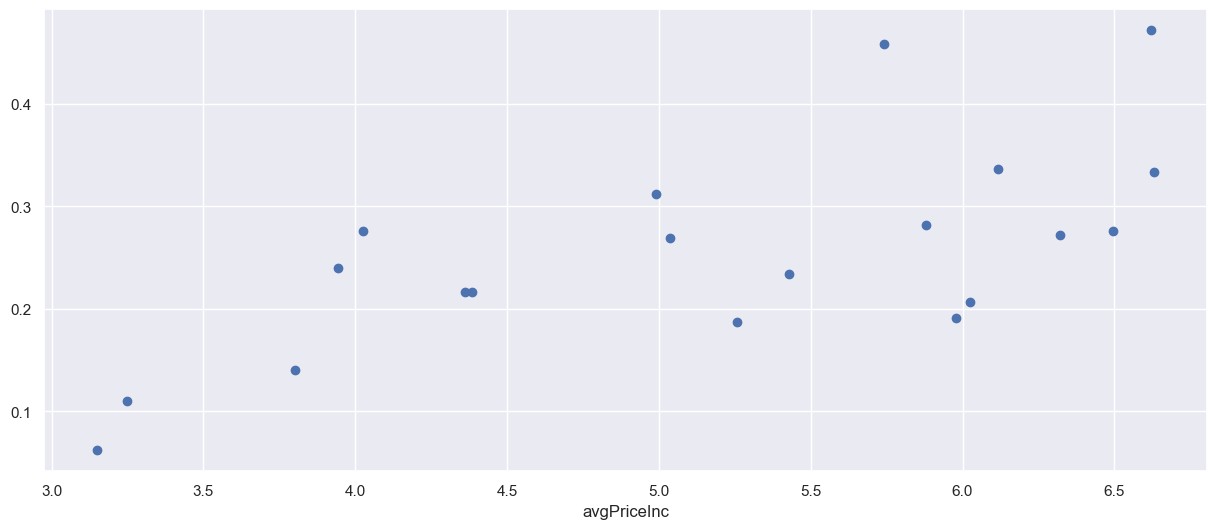

In [122]:
def calculateHHI(df):
    df2 = df.reset_index()
    M = df2.mktid.unique()
    HHI = []
    for mi,m in enumerate(M):
        s = np.array(df2[df2.mktid==m]['share'])
        HHI.append(np.sum(s**2))
    return HHI

HHI = np.array(calculateHHI(df))
import matplotlib.pyplot as plt
plt.scatter(avgPriceInc, HHI)
plt.xlabel('HHI')
plt.xlabel('avgPriceInc')
plt.show()

### Marginal Cost Function

Model: $mc_{jt}=\gamma_j+\gamma_0 w_{jt} + \mu_{jt}$

Conditions for consistency of $\gamma_j$ and $\gamma_0$:
   - $E[\mu_{jt}w_{jt}]=0$: supply shocks do not correlate with supply shifter
   - $E[w_{jt}w_{jt}]$ is full rank - there is sufficient variation in supply shifter 

In [102]:
logit_ols = sm.ols(formula="mc ~ wvar", data=df2).fit()
print(logit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     mc   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     40.33
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.60e-09
Time:                        12:26:54   Log-Likelihood:                -189.02
No. Observations:                 188   AIC:                             382.0
Df Residuals:                     186   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1740      0.049     65.432      0.0

eval_env: 1


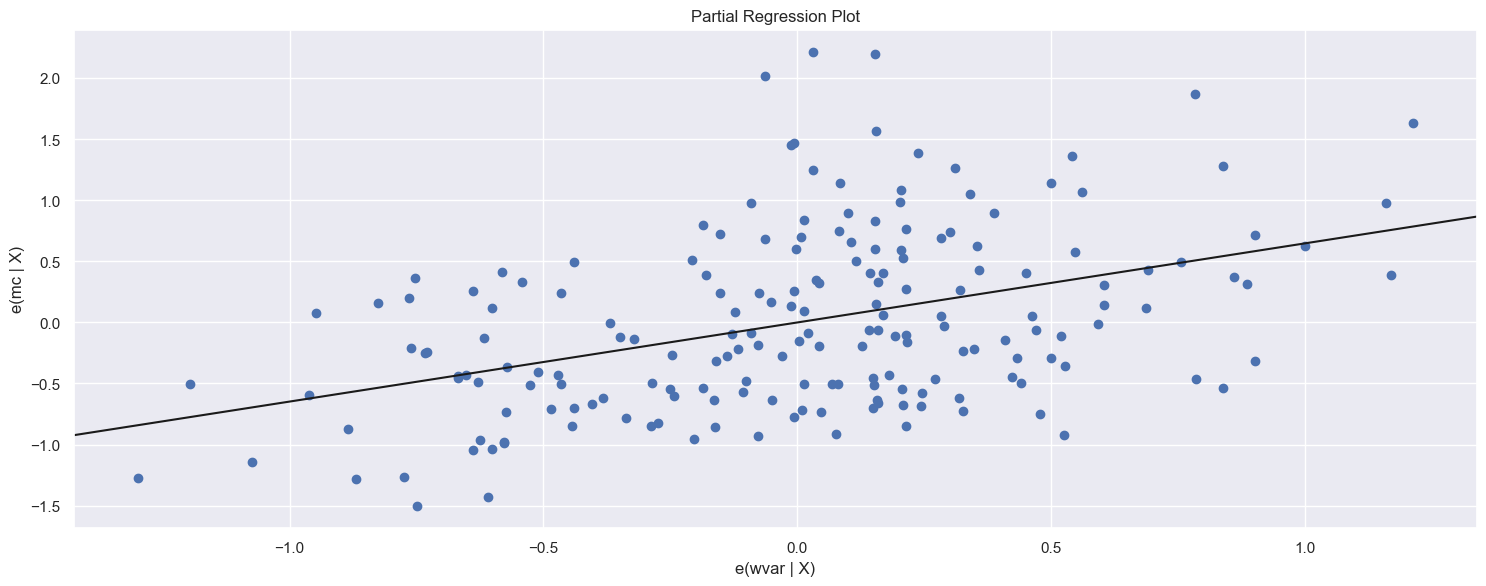

In [103]:
# Partial Regression Plot of logshare-E[logshare|xvar] on price-E[price|xvar]
import statsmodels.api as sm_
fig = sm_.graphics.plot_partregress("mc", "wvar", [], data=df2, obs_labels = False)
fig.tight_layout(pad=1.0)